Visualización de datos usando Matplotlib
==========================================

* *120 min* | Última modificación: Junio 22, 2019

Existen varios recursos externos para el aprendizaje de matpotlib. Algunos son listados [aquí](http://matplotlib.org/resources/index.html).

[Aquí](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) hay un tutorial escrito en Jupyter sobre matplotlib que ilustra como resolver muchos problemas comunes en la elaboración de gráficos. 

Del libro [Python Data Science cookbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

A continuación hay varios ejemplos autoexplicativos que tienen como fin ilustrar rápidamente las capacidades básicas de matplotlib. 

Para manejar la librería, usualmente se define el tipo de gráfico que se necesita y se buscan ejemplos con características similares en la [galería](http://matplotlib.org/gallery.html). 

---

La ventaja de herramientas comerciales como Tableau, es la calidad y facilidad para realizar gráficos explicativos. El siguiente gráfico contiene la suma de la población por región y edad, y fue construido usando Tableau usando los datos del archivo `indicadores-mundiales.csv`. 

![alt text](assets/suma-pob-region-edades-1.png)

A continuación se construye una versión de este mismo gráfico usando Python y `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline

In [2]:
## Se lee el archivo
df = pandas.read_csv('files/indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')

In [3]:
## Nombres de las columnas
df.columns

Index(['Ano', 'Dias para iniciar un negocio', 'Emisiones de CO2',
       'Esperanza de vida (mujeres)', 'Esperanza de vida (varones)',
       'Facilidad para hacer negocios', 'Gasto en salud ( del PIB)',
       'Gasto en salud (per capita)', 'Horas preparar los impuestos',
       'Interes de prestamos', 'PIB', 'Pais', 'Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+', 'Poblacion total',
       'Poblacion urbana', 'Region', 'Tasa de mortalidad infantil',
       'Tasa de natalidad', 'Tasa tributaria empresarial', 'Turismo emisor',
       'Turismo receptivo', 'Uso de Internet', 'Uso de energia',
       'Uso de telefonos celulares'],
      dtype='object')

In [4]:
##
## Computa la suma del porcentaje de la población por región
##
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data

Poblacion 0-14  Poblacion 15-64  Poblacion 65+
Region                                                       
Asia                   5318.6          10668.7         1013.0
Europa                 3780.2          13830.6         2890.5
Las Americas           5375.5          10901.8         1223.1
Oceania                1784.8           3133.1          282.5
Oriente Medio          1754.7           3251.1          194.2
africa                11136.2          14452.7          911.7

`matplotlib` contiene varios tipos de gráficos, entre los que se incluyen:
* `plot(x, y)`
* `bar(x, y)`
* `barh(x, y)`
* `hist(x, bins)`
* `boxplot(x)`
* `triplot(triangles)`
* `scatter(x, y)`

## Ejemplo usando directamente `matplotlib`

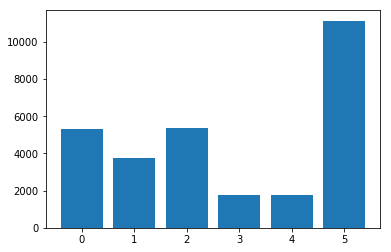

In [5]:
plt.bar(range(6), data['Poblacion 0-14']);

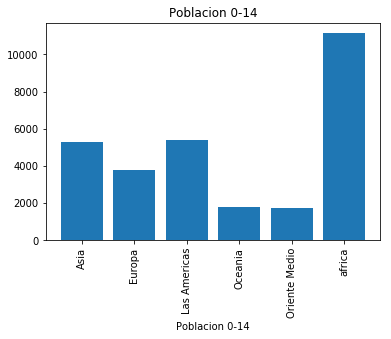

In [6]:
plt.bar(range(6), data['Poblacion 0-14'])
## >>>>>
plt.xticks(range(6), list(data.index), rotation='vertical')
plt.title('Poblacion 0-14')
plt.xlabel('Poblacion 0-14');
## <<<<<

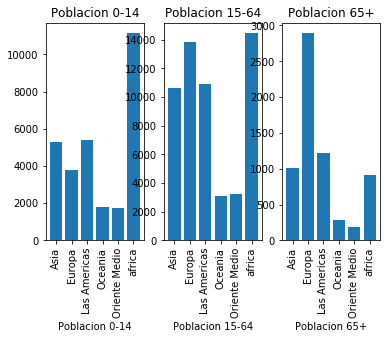

In [7]:
## >>>>>
for index, colname in enumerate(data.columns):
    plt.subplot(1, 3, index+1)
    plt.bar(range(6), data[colname])
    plt.xticks(range(6), list(data.index), rotation='vertical')
    plt.title(colname)
    plt.xlabel(colname);
## <<<<<

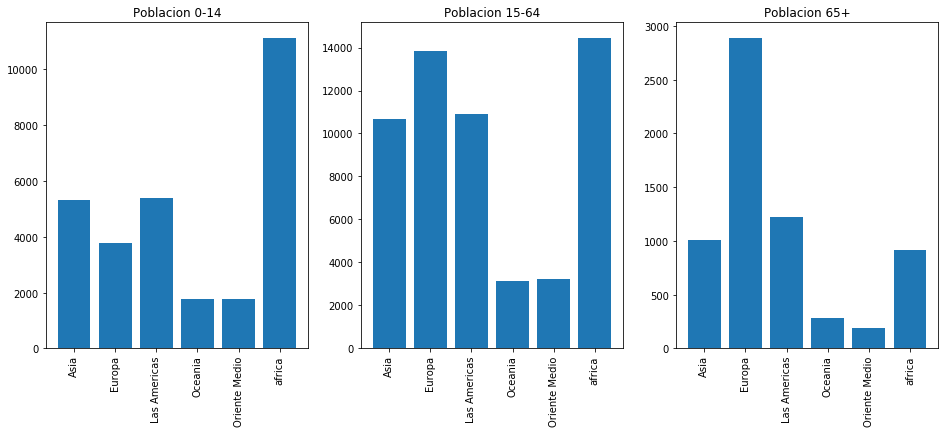

In [8]:
## >>>>>
plt.figure(figsize=(16, 6))
## <<<<<
for index, colname in enumerate(data.columns):
    plt.subplot(1, 3, index+1)
    plt.bar(range(6), data[colname])
    plt.xticks(range(6), list(data.index), rotation='vertical')
    plt.title(colname);

La principal crítica a la gráfica anterior es que la alienación se realizar por el eje Y que tiene distintas unidades para cada grafo. Resulta mejor hacer coincidir el continente con el eje Y. **¿Es más fácil la comparación en el gráfo de abajo?**

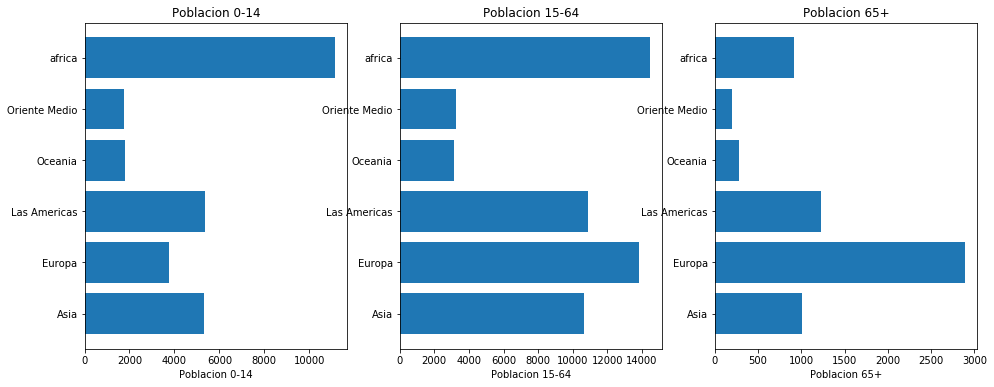

In [9]:
plt.figure(figsize=(16, 6))
for index, colname in enumerate(data.columns):
    plt.subplot(1, 3, index+1)
    ## >>>>>
    plt.barh(range(6), data[colname])
    ## <<<<<
    plt.yticks(range(6), list(data.index), rotation='horizontal')
    plt.title(colname)
    plt.xlabel(colname);

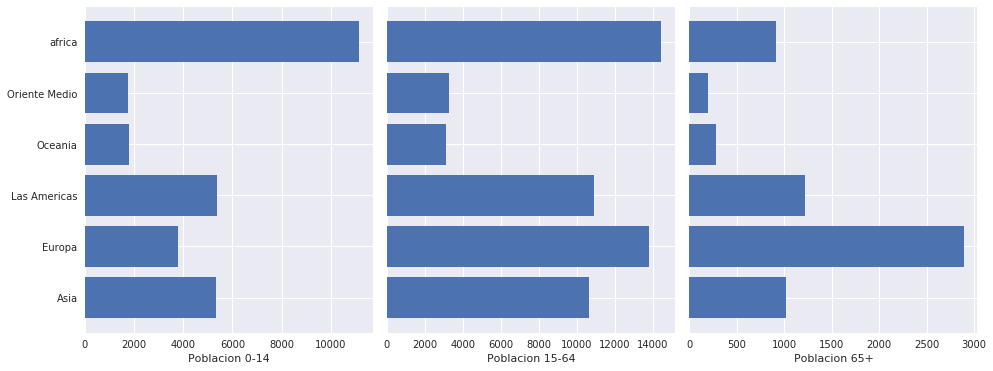

In [10]:
## >>>>>
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 6));
plt.style.use('fast')
plt.subplots_adjust(wspace = 0.05, hspace=0.1)
## <<<<<
for index, colname in enumerate(data.columns):
    axs[index].barh(list(data.index), data[colname])
    ## plt.yticks(range(6), list(data.index), rotation='horizontal')
    ## plt.title(colname)
    ## plt.xlabel(colname);
    axs[index].set_xlabel(colname)

Para cambiar los estilos de colores: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html 

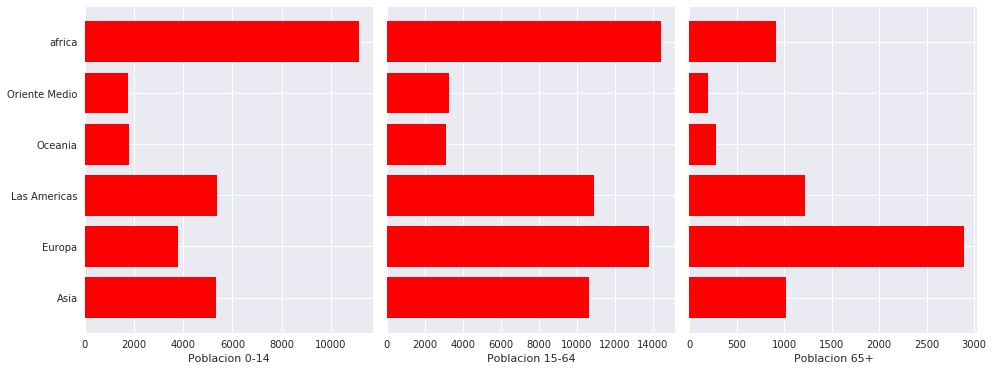

In [11]:
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 6));
plt.style.use('fast')
plt.subplots_adjust(wspace = 0.05, hspace=0.1)
for index, colname in enumerate(data.columns):
    ## >>>>>
    axs[index].barh(list(data.index), data[colname], color='red')
    ## <<<<<
    axs[index].set_xlabel(colname)

## Ejemplo usando pandas

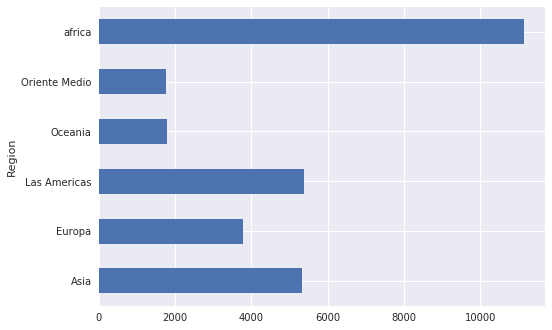

In [12]:
data['Poblacion 0-14'].plot.barh();

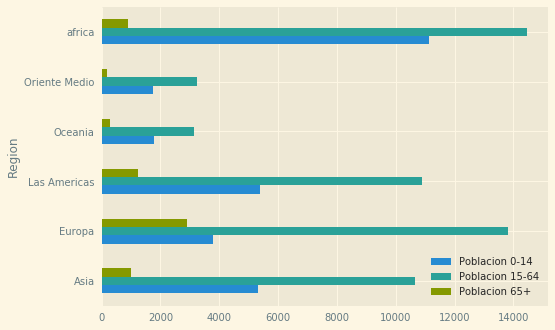

In [13]:
plt.style.use('Solarize_Light2')
data.plot.barh();

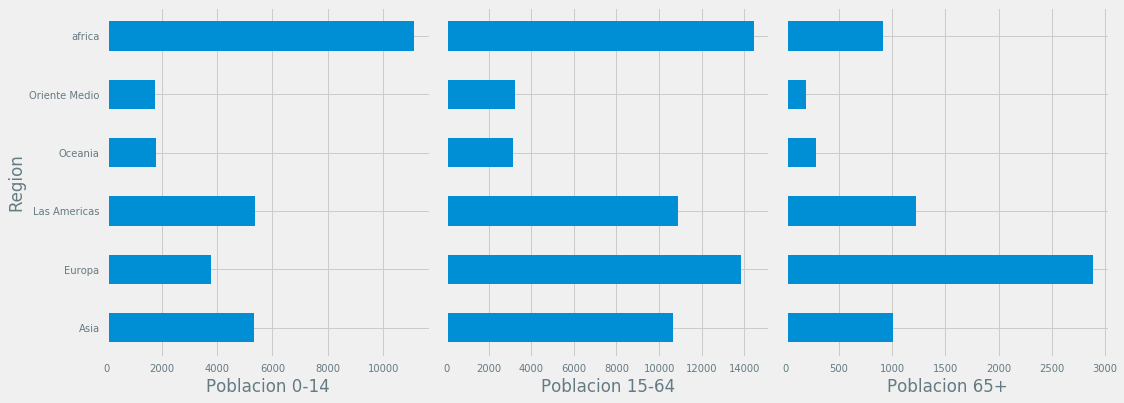

In [14]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 6));
plt.subplots_adjust(wspace = 0.05, hspace=0.1)
for index, colname in enumerate(data.columns):
    data[colname].plot.barh(ax=axs[index])
    axs[index].set_xlabel(colname)

**Bibliografía**.

| [Matplotlib](http://matplotlib.org) web site.   
| [Matplotlib gallery](http://matplotlib.org/gallery.html) at matplotlib.org  
| [ggplot](http://ggplot.yhathq.com/docs/stat_function.html)  
